**Cost Function**

This model has two model parameters, θ0 and θ1.⁠ By tweaking these parameters, you can make your model represent any linear function, as shown in the following figure. <br>
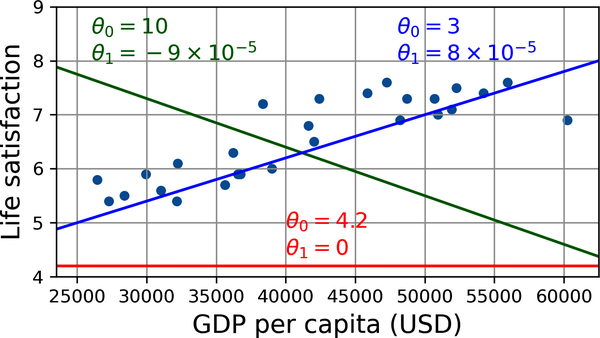

Before you can use your model, you need to define the parameter values θ0 and θ1. How can you know which values will make your model perform best? To answer this question, you need to specify a performance measure. You can either define a utility function (or fitness function) that measures how good your model is, or you can define a cost function that measures how bad it is. For linear regression problems, people typically use a cost function that measures the distance between the linear model’s predictions and the training examples; the objective is to minimize this distance.

**Training Models - Minimizing the Cost Function**

So far we have treated machine learning models and their training algorithms mostly like black boxes. If you went through some of the previous exercises, you may have been surprised by how much you can get done without knowing anything about what’s under the hood: you optimized a regression system without knowing how it actually works. Indeed, in many situations you don’t really need to know the implementation details.

However, having a good understanding of how things work can help you quickly home in on the appropriate model, the right training algorithm to use, and a good set of hyperparameters for your task. Understanding what’s under the hood will also help you debug issues and perform error analysis more efficiently. Lastly, most of the topics discussed in this chapter will be essential in understanding, building, and training neural networks.

In this part we will start by looking at the linear regression model, one of the simplest models there is. We will discuss two very different ways to train it:


*   Using a “closed-form” equation⁠ that directly computes the model parameters that best fit the model to the training set (i.e., the model parameters that minimize the cost function over the training set).
*   Using an iterative optimization approach called gradient descent (GD) that gradually tweaks the model parameters to minimize the cost function over the training set, eventually converging to the same set of parameters as the first method. We will look at a few variants of gradient descent that we will use again and again when we study neural networks: batch GD, mini-batch GD, and stochastic GD.



**Linear Regression**

We looked at a simple regression model of life satisfaction: <br>
life_satisfaction = θ0 + θ1 × GDP_per_capita <br>
This model is just a linear function of the input feature GDP_per_capita. θ0 and θ1 are the model’s parameters.

More generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term), as shown in <br>
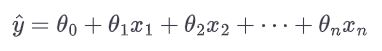

In this equation:


*   ŷ is the predicted value.

*   n is the number of features.
*   xi is the ith feature value.


*   θj is the jth model parameter, including the bias term θ0 and the feature weights θ1, θ2, ⋯, θn.



This can be written much more concisely using a vectorized form, as shown in <br>
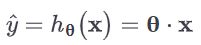

In this equation:


*   hθ is the hypothesis function, using the model parameters θ.

*   θ is the model’s parameter vector, containing the bias term θ0 and the feature weights θ1 to θn.
*   x is the instance’s feature vector, containing x0 to xn, with x0 always equal to 1.


*   θ · x is the dot product of the vectors θ and x, which is equal to θ0x0 + θ1x1 + θ2x2 + ... + θnxn.



OK, that’s the linear regression model—but how do we train it? Well, recall that training a model means setting its parameters so that the model best fits the training set. For this purpose, we first need a measure of how well (or poorly) the model fits the training data. <br>
We saw that the most common performance measure of a regression model is the root mean square error. Therefore, to train a linear regression model, we need to find the value of θ that minimizes the RMSE. In practice, it is simpler to minimize the mean squared error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a positive function also minimizes its square root).

The MSE of a linear regression hypothesis hθ on a training set X is calculated using <br>
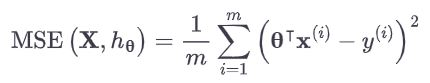

Most of these notations were presented in Chapter 2 (see “Notations”). The only difference is that we write hθ instead of just h to make it clear that the model is parametrized by the vector θ. To simplify notations, we will just write MSE(θ) instead of MSE(X, hθ).

**The Normal Equation**

To find the value of θ that minimizes the MSE, there exists a closed-form solution—in other words, a mathematical equation that gives the result directly. This is called the Normal equation <br>
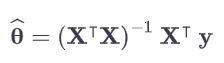

In this equation:


*   𝛉-hat is the value of θ that minimizes the cost function.
*   y is the vector of target values containing y(1) to y(m).



Let’s generate some linear-looking data to test this equation on.

In [ ]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

In [ ]:
X.shape

(100, 1)

In [ ]:
y.shape

(100, 1)

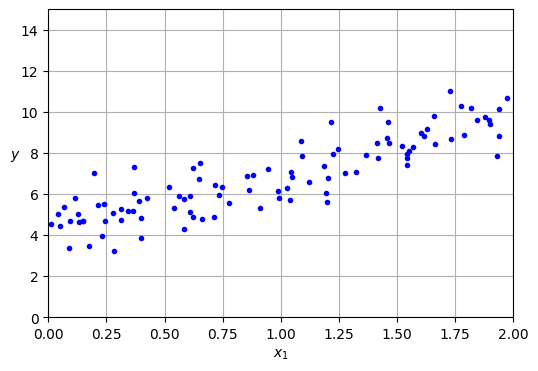

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

Now let’s compute
  θ-hat using the Normal equation. We will use the inv() function from NumPy’s linear algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication:

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [ ]:
X_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

**Note:** The @ operator performs matrix multiplication. If A and B are NumPy arrays, then A @ B is equivalent to np.matmul(A, B). Many other libraries, like TensorFlow, PyTorch, and JAX, support the @ operator as well. However, you cannot use @ on pure Python arrays (i.e., lists of lists).

The function that we used to generate the data is y = 4 + 3$x_1$ + Gaussian noise. Let’s see what the equation found:

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 4.215 and θ1 = 2.770. Close enough, but the noise made it impossible to recover the exact parameters of the original function. The smaller and noisier the dataset, the harder it gets.

Now we can make predictions using θ-hat.

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

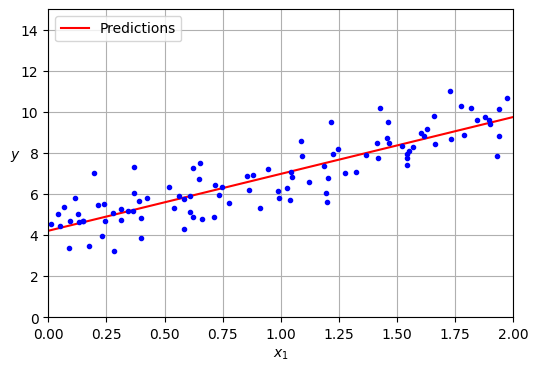

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

plt.show()

Performing linear regression using Scikit-Learn is relatively straightforward:

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

Notice that Scikit-Learn separates the bias term (intercept_) from the feature weights (coef_). The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”), which you could call directly:

**Gradient Descent**

Gradient descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of gradient descent is to tweak parameters iteratively in order to minimize a cost function.

Suppose you are lost in the mountains in a dense fog, and you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what gradient descent does: it measures the local gradient of the error function with regard to the parameter vector θ, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!

In practice, you start by filling θ with random values (this is called random initialization). Then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum: <br>
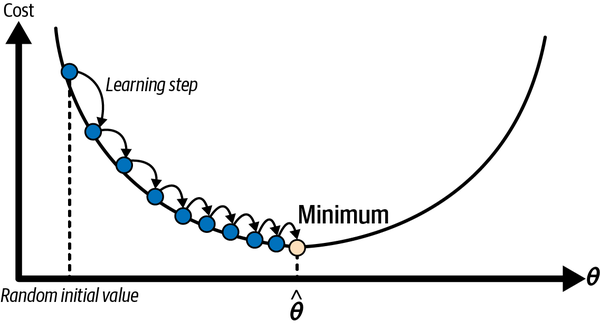

**An** important parameter in gradient descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time: <br>
![mls3_0404.png](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAlgAAAE0CAIAAAB/**2to3AAAACXBIWXMAAC4jAAAuIwF4pT92AABt3ElEQVR4nO2dd3gU1dfHz52Z3fROSEIqkFBC6KEjvfcmIEpTBEUFKYodQVFQFEHxh5UqSBMIvfdepYaWhDQS0vuWmbnvH8fMGymRFpKB83l8cHcyO3un7HznnHsK45wDQRAEQTyrSNorVVU554wxfMs5F0XxIbaoqipjTNsOQRAEQZRlGFqEqqoKglDagyEIgiCIJ40EhSp44sSJ**+fPnnzlzJjc3t1KlSgMHDhwwYEBRG/E+SUhIsLOzc3d3L5kBEwRBEMTjhCmKIgjCrFmzxo8f7+vr27lzZzc3tyNHjlit1t27d9va2qLLFA1HxpggCJo0qqqqqiq+xuWyLFesWLFjx47z5s1TFMXW1rbU9owgCIIg7gNJEIQDBw6MHz++Z8+eS5cutbe3xz/k5ORIkgQAd7pM0UzknAuCcNtfDQZDQkJCbm6uwWAwGAxPZh8IgiAI4qGRAOCnn34SRXH27Nn29vZWqxW1zcnJCQDQEFy5cuXKlSvNZnPnzp2HDh1qb2+PWrh///5FixYlJiaGhoaOHj3aYDC89tproigeOnSoa9eu1atXnzlzJs0+EgRBEGUZAQD27NkTFhbm5+fHOZckSRRFURR5IYMGDRowYEBSUlJWVtbo0aPbtWuXkpLCGFuyZEmLFi327t1rb2+/atWqBQsWoB8VXamCIFBiBkEQBKEDkpOTBUHo3bs359xqtWr6J8sy53zp0qUA8Msvv+DCrVu3AsDkyZM550FBQfXq1cPVOOfp6en4QpIkjLIhCIIgiLKPkJOTo6oqpgzyIjYcRsQsXry4YsWKr7zyCudcVdUOHTo0adJk+fLlnPO8vDxnZ2ftg25ubgCgKAoAyLKsqqrFYikNZScIgiCIB+CfENA7cyRwYu/EiROhoaGMMUVRFEXhnDdo0CAyMhIAnn/++T179owYMeLYsWPax7XpwKLBpQRBEARRZhHs7OwEQbBarXA3OczNzcUAUXzLCikoKPj444979uz522+/NWrUqHv37gkJCfBvm5IgCIIgyj6Cj4+Pu7t7XFwc5xxjZPAP+OK2BAnNo2q1Wr29vdeuXXv27Nk33nhjw4YNEydOBBJCgiAIQm8IANC8efPz58/Hx8czxqxWq6IosiyjdVipUqW4uDjNUmSMRUdHe3t7Ozg44CxgzZo1f/jhh/bt20dERACAKIq4MrpSS2+/CIIgCOK+EABg8ODBZrP5008/BQCj0SiKoiRJBQUFqqr27dv39OnTx44dkyTJYDDExsZu3bq1V69ekiQJgmA0GnErqqo6ODjga845Y0wURSorQxAEQZR9mKIoqqqOGjXq999/r1u3bp8+fZydnY8fP37kyJGTJ0+aTKYGDRqkpqa+9957jo6OX375pdVqPX78eOXKlTt16lSzZs0aNWocPHjwt99++/jjj6dOnQoAtWvXvnLlyrRp0xwcHIYMGWJnZ8cfvGApQRAEQTwZGHZN4pwvWrRo8eLFf//9t62tbUBAQLdu3SZMmGA0Gq9evTplypRNmzYJgtC6deuPPvqodu3anPPJkyevXLkyKSnJ1dV1xIgR48aNs7W1FQRh3759EydOjIyM7NOnzy+//CJJEqkgQRAEUWZhxYe3aMYcLyy6XXQh3Lt/E1mBBEEQhC74fw3DNEF8zTnHUBfGGFZNw6wJ7TUU5s6jChb9LPajKJp0QRAEQRBllgeQK0ycoO7zBEEQxNME2W0EQRDEM839NkhCc3DmzJkZGRn4ukSHRRAEQRBPhvsSQkVRGGN79ux55513Fi1ahJOFJT0ygiAIgngC/LdrFO0/WZZbtGhx7Ngxb2/v06dPly9fnnNOHXcJgiAIvfPfSoYJEr/++uvRo0cNBsPNmzenTp36ZIJCMUi1pL+FIAiCeJb57zxCAEhJSalfv35iYiLqnyAIhw8fDg8PVxQF+xGWKJSSSBAEQZQc/2ERYtbg559/jiW5cbJQluUPPvjgCViEhw4dOn36NKkgQRAEUXIUJ4TYuf7MmTO//vqrIAjopVQURRCE7du3r1y5UhTFkmgxgducNm1as2bNmjZtunHjRm0hQRAEQTxe/nuO8MMPPywoKLhtUpAx9tFHH+Xn55fEZKEgCJzzHTt2AIDJZFq7di0UFqwhCIIgiMfLPYUQLb+IiAgst11Uh9BfevXq1W+//fa2Pz0WcFLQx8cHq9jk5OQ83u0TBEEQhMbdhRClqKCg4N133y1adLvoCoIgzJo169q1a49dC3Frbm5umLmRnp4OAJIkURY/QRAE8di5uxBiysT3339/+fLlu+ocKmV6enpJpFLg1sqXL49v09LSzGYzhcwQBEEQJcFdhBBVMDEx8auvvipG5DB3YunSpXv37n28UTOoeT4+Pvg2JSUFvaNkERIEQRCPnXu2Evzoo4/S0tKKd3tit6YPP/wQ0yoel1ChEAYEBODb5OTkzMzMx7JlgiAI4omhl6Iotwsh2nmHDx9evHixIAjF23mYX3Hw4MEFCxY8xplCFEJ/f39JkgDAYrGkpKQAWYQEQRC6QhAEzAIo7YH8B3exCK1W6wcffCDL8v1My6H5+Nlnn6Wnpz8uoxC/18/Pz87ODpdcu3bt0TdLEARBPBlQC44cOXLhwoWyH+HxLyFEc3D58uV79uz5T3MQwQnFGzduTJ8+/fGGj9rb22ve0ZiYmMe1WYIgCKJEwcmyb775pmnTpo0aNdq8eTOU7aIo/y+EmBGRmZn5ySefPJCAoxbOnTv30qVLj0UL8dsNBkPFihVxCVqEZd++JgiCILBV35IlSzjneXl5W7duLe0R/Qf/L4SYJj9r1qzo6OgH0jP0jubn53/wwQePyzuKzw5BQUH4NioqCgCo6xNBEEQZB22qlJQUjO1gjFWvXh3KtiXzj7SgVRcZGTlr1qyHsOqwDM3atWu3bt36WFIpcACaRZiUlJSZmamLSVeCIIhnGbx7x8TEJCcnAwBjrFq1alDo6iub/COEaNV9+umnOTk5j2LVvfPOOyaT6dHtQjT+KleujG8TEhKSkpKgbD9TEARBEMi5c+dkWQYANze30NBQKNsuPQEKY2R27969evVqSZLQR1qUu37ytnUwleLcuXO//PLLo88U4pdWrVrV1tYWAAoKCuLi4oCEkCAIQg+cOXMGX1SuXNnT07OMt5UV0J9rtVonTZoky7KiKPwO7vrJO9fRmhcmJyeLovgoWoiHLCgoyNXVFZdcuHDhobdGEARBPBnw7n3ixAl8W6dOnWJ0pIwgoHr9+uuvx48fNxgMwh2IonhXJcc/FV2TMSZJ0q1bt6ZOnfqIu43faGtrW6VKFVxy/vz5R9kgQRAEUdJoFToxwhEAwsPD0WVYugMrHkkURQBo2rTp/v3774xGUVXVYDB8+OGHu3btQocnzv95enouXLjQxcUFl2jr4w4bjUb0lD7KyPCAhoaG7tu3DwDOnTsHZXu6lSAI4hkHFeTq1atpaWkAIIpi2Y+UAQAJ/1e7du1iVvL29oZ/74mNjU3r1q1xAq+EQCEMCwvDtzdv3kxJSSn7vmaCIIhnFhTCixcvoglYrly5qlWrgl6EUFXVuzoz0bCzWq23Leec5+bmouV35x4yxh49QAg3GxISgpbozZs3Y2JiPD09H93WJAiCIEoCvPPv378f3wYHB5cvXx6tmlId13/wz+Bwwu9OtMm/u3yycAbxrp969JHhl9asWRPjZWRZpoqjBEEQZRmszXnq1Cl827x5c9BDtH/ZVWlUUx8fH19fX1xy9OjRUh0RQRAEcU/QHXr9+vX4+HhcUrdu3VId0f1SdoUQCg9rgwYN8O3p06ehbGdlEgRBPLPgHfvMmTN5eXkA4OjoWLNmTSjzE4SgCyHUnimio6OzsrIeYwdggiAI4nGBN2fNL+rv71+5cmVdhDeWaSHU6stg8ZrExERMoijjKSkEQRDPIJh0fuDAAXwbFhZmY2Nz14DKskaZFkL0gtaqVat8+fKcc0VRMK2eLEKCIIgyBdonSUlJf//9Nypfu3btSntQ90uZFkI0tL28vAIDA3HJsWPHgKYJCYIgyhhonxw/fjw3NxcAJElq2LBhaQ/qfinrinJbvMzx48exOGqpDoogCIK4CydPngQAznlgYCA2lNXF7VoHQwSAZs2aAQBj7MaNG9HR0UDeUYIgiLIECt7BgwfxLaaAK4pS9icIQS9CGBYWhuXccnJysKj5o/f+JQiCIB4LGBqanp5+/PhxXNKiRYvSHdIDUdaFEOuAh4SEVKpUCa1ATKvXxVMGQRDEswDOYR06dAgz3BhjWFNGL5R1IcR2Fra2tuHh4bjkyJEjAEDlRgmCIMoIaKXs3bsXXwcFBWEHPV1MEELZF0INbZrw/PnzN2/eBJomJAiCKANwziVJUlUVo/oBoGHDhi4uLrIs68V1pwMhxEMZHh4uSRIAZGdno3eU0uoJgiBKHbRJEhISjh8/jrdrfU0Qgo6EsEqVKto0oVa5gCAIgihdtNtyQUEBAIii2KpVK9CPXxT0IoSKojg6OmrZhHv37uWci6JI3lGCIIiywM6dOwGAc16jRo3KlSuDrkIadSCEGliwhzF29uzZmJgYWZZlWVYURVEUWZZJFAmCIJ4waJMUFBQcOnQIlzRr1szGxkZHE4SgFyHEA9q0aVNbW1vGmMVi2b9/vyRJBoMBWwFLkoSGI8khQRDEEwNvuVeuXImMjMQbNfpFdaSCACCV9gDuCyw6GhQUFBoaij0+1qxd5+Tscv78eavV6uzsXKlSpRYtnivn4QEAqqrqyDdNEAShX/B+u2nTJsypd3JywkgZfd2EdSOEsiwbDIa2bdueOnValKS1a/5au+avoutU8Co3cPDwdyZO8PbyUhSFEg0JgiBKGqx5omUQPvfcc97e3rrzzOlDCBHGmIuLKwAH2QoeQWJoW+YbBkYHyEvnCecTz275dubXEWvXLF26tEGDBmQXEgRBlCh4m01MTDxx4gT67Z577jkAUBQFs930gj7Giod1+/Ydn302lUlGtdkrULe3YusMqgIMgAOEtBIaDhKP/3Ht8B+du3TZsX17nTp1SAsJgiBKDs45moNpaWl4s+3QoQPozS8KugiWwQbHCQmJg4cMNptl1m0yb/YyMAEKssCSB+Y8sORBQZZqsLW2eltqPzYtNfWVESPy8/PxCaW0h08QBPHUwhjbtGkTAKiqWqNGjTp16oDeImVAF0KIDQi/+fbb5KQkqeUramgHyE0D4CCIwIR//hNEUBTIT5fDB0m1upw6eXLh4iVYp7S0h08QBPEUoqqqKIrp6en79u3DJR06dBAEQS+tl4pS1oUQk1SysrP/Wr6U2bmodXqDKQcEEeCOA80YMAZWE288mDFpwW+/WK0yTuSWxsAJgiCeZvDWeurUqdjYWPSFtm3bFvRZBbqsCyGadOfOnY9NuMmqtlLtXEG1wr0eN5gAskV19eN+tS+dOxcXH0/eUYIgiJJj/fr1AKCqqq+vb8uWLQFAX2EySFkXQiQ+IYEDCD7VgfO72IL/gnMmiH6hOSZzaloa6PPxhCAIoowjCILJZNq+fTu+bd++vYODg05no/QhhFmZmQAANg7A7mfADEQDkC1IEARRMuBE4IkTJ65evYpJ2507d+ac61QIy7oNi2Lm5+8PADwrCbhyH59ReW6qCNxgMJT08AiCIJ5ZNmzYgDVFPT09W7VqxRjTaSWTsm4R4hxsUECgnSSq1w4zACjezmOCIJvV68d8vDwD/f1Bh4G8BEEQZRxRFK1W67p16wCAc96mTZvy5ctjqltpD+1h0IEQqqparVqVeg0bQsLfQtIlsHEA9R52oSKDjSOLPgI5SS3bdfTwcFcURXepnQRBEGUZRVEA4MiRI5pftG/fvvr1i0LZF0IozKAYM24CVxW2Zy5YTSDZgKoAFDUNOSgy2DqynGTY97MgiGPGjAUyBwmCIEqGjRs3KoqiqqqXl1eLFi306xcFXQghZmj27d1rwMAX5BunDZs/Z7IJ7JyBiQAAXAUAYBLYu7GcZHHjFCXtxvvvv9+wQTiVWCMIgni8oGVitVrXrl2Lb1u1auXl5aXHPHqNsh4sAwCMMdSzX37+KTMzc+uWzSwlWnruZcW/Pjc4gMEWZAsUZIoXNyv7f5Pz0ga+MOiTTz4mpyhBEMRjBwvKoF8Up6769etX2oN6VHQghFDYj9DJyWnNX6vfe/+DH2Z/J6+dDEZH8K0B9q6Qmwa3rioFWS6O9u9O++L999/D9fX7eEIQBFE2wfvqihUrMDTG29sbO07o2vDQhxBCoRba2dnN/m7WoEGD/vzzz3V/rYyOPioAqACSAK+OfmPcuLdDgoOxTz1jTDMlCYIgiEcHKz/n5+dHRETg23bt2nnpvwWsboQQCrWQc96oYYNGDRsEV6785ltviUYjUxRVVQb0fz4kOBgAip4PdJCSaUgQBPHoYODF1q1bY2NjRVFUFOWll14q7UE9BvQkhACAdp7FYhEEwcbGCFwFVeGqoqrqtC++jIqO+fvMGbOpwL2cZ61atZo3a+brWwEKT15pj50gCELf4B0Yw2RUVa1cuXKTJk3QTCztoT0SOhNCRBAESZK0CmqqyoGx7du2bt+2tehq3uXc+w0a/OH773l7e+vdcicIgihd0KK4devWunXr0D/XrVs3Z2dnWZb1WGi7KDoe/T9CyBgABw6Cf22hRgderhIYbMCUy25eSDq1/oc5szdErPtj6dKmTZqQXUgQBPHQ4C109erVWVlZoihyzl988UXQeZgMomMh/OcZRLGCrTO0fkMN66QKBuAcuAqCAIENWJ2+0ollMQfmd+3adc/u3bVr1yYtJAiCeAgwfZBzvnz5cux5Hh4eXqdOnacjPl+XqoBWeUBAIACTjU6s71dQpzdYzWDKAUseWAvAnAcF2ZwJ1hajpc7vZmZkvPzKCJPJTO0JCYIgHgIUvDNnzhw4cABvpAMGDDAYDLrOo9fQqxAyxpavWA7AhRYjeWA9yEsDJoAgAhP++U8QATjkpcu1+4i1Op86eWLpsmWMMaySRxAEQdw/WEd02bJlmJ/m6Og4cOBA+HeUvn7RnxBihFJC4s2lixaAW6BaozMUZIN4145LDBgDxQINX2SM/bF4EdZEIKOQIAji/uGcS5KUk5OzatUqtP+6devm6+ur33YTt6E/IcQHkxMnT+abraxqC7BxvGczCgBgAsgW1cWXe4WeOHwoMyv76ThtBEEQTwy8665fvz46Ohr9ooMGDQItYlH/6E8I8dBHR0UBgOgdwhUZitc2VeFGB/AKzjaZb8TGwlN08giCIJ4AKH4LFy7EF8HBwe3atYOnIl4U0d9uoIyZTSYAYEb7fzdjuvsnQBBANABjVqu15AdIEATx9IDB9ufPn9+7d68gCJzzIUOG2NnZPR1hMoj+hBAPvY+vLwBT0uNB+K+pWiYyawHkpEice5UvD9SkkCAI4r5B22PhwoVms5lzbmtri37Rp+lGqj8hRGO8Tu06InD1+lHGORTj6uQcBJEVZLPYM8FVKnt7ez25gRIEQegcDE5MS0tbsWIFNl3q2bNn5cqVn7KcbP3tCR79GqHVwhs2hBsn2M0LYONwz3gZVQEbB+HaXm7O6tKjt43R+DSZ8wRBECUKxoWuX78+Li4O771Dhw7F5gelPbTHif6EEABkWRZFccALLzDVKu2fB7IZDLagyv+aL+QcVBnsXdita+q+XxwcHV8bOQqeLnOeIAiiREErcN68eYwxWZZr167drl07xtjTkT6ooUshRDGrVrUqB7BEn5Q2f85MOWDvCgzPDQcAkIxg7y4kXeJr3lPzMr788suQkGBZllVVxVBggiAIohjQf7Z3797jx4+j8o0YMQKryZT20B4zuhRCURRVVe3cufOcOXMcHJ3kS7v54lHS32tEax4TRSYaAQAy4ti+eerCUcbMuKmfff7Wm28CgCRJkiRh4BPJIUEQRDGgyfG///0P7QdPT88XXngBnqKsCQ29Ft1GMXvrrbcGDhw467vZs76ebto0A+BrKF8VHFxZfipPi2WyuUKFCs+1asMAevXsociyi5t73Xr1WrVqXb9eXawb+/SdUYIgiEcHZwcvXLiwfv16rQevh4fHU3nb/I8i1NjGb8CAAStWrMBjgQmVvr6+Z8+edXd3L93S41ofrIuXIufPn3/4wL64mKjcnOz0XBMAgCA5O9pZ83IK/rHjJQAZAGwE6NKr75dfTKtatSr1KSQIgrgTFLzx48fPmjVLFEWDwXDy5Mnq1as/BW1470SvFiEUlr/D16HVq3391QxV5ekZ6WaL9c03Rq9du05U5eycAqjeUarVibv6ARNBNrHkSPPJNWv+Wr13966FixZ169btqXzAIQiCeGjQHExOTl6wYAH2KujTp09oaOjTajnoVQDwPO3cubNZs2Zbt25VVdVisQgCK+fh4evj7e8fAFxl5SvDSz+ynlPlgAaKY3nFwV1x8ZNDO7NBc6UO49MzswcMGHD48GEMiyrtHSIIgigroKtvwYIFGRkZoihKkvTmm2+W9qBKEF0KIarg0aNH+/bte+jQoU8//VQQBFEUZVnmnO/YueuH7+cwjyCl79dQIYznZ4AlH2QLyFaQzVCQza0mOfwFqcfH+fn5r44cmZ+fT30KCYIgEHR+5uXl/fTTT5g10ahRo2bNmmFv3tIeXYmgYyE8efJkVlZW0RMjiiJjbNrnn3HOhbZvcZcKUJAFggRMAMb++U8QgTHIS5dDO0l1e104f/6PpdSnkCAI4h/wBrt48eLo6Gi8wU6YMAFj9Ut7aCWFLoUQMRqNRQXsnxinS5EH9u4B/7pqYEMwFdun0Grh9Z9nTFi+7A8OQH0KCYIg0By0WCw//vgj3mBr1arVpUuXpzJGRkPfO1ZUuvD10SNHZA5CSFMuGYurQcoEUCyqsw8vX+3U0cM5OblUcYYgCAItitWrV587dw6z1MaNG2djY/PU9OC9KzoWQlmW8cTgcwqa7TduxACAWD4YFOt/9ikEW0coF5CTZ4qNiwPqU0gQxDMPY8xsNs+YMQMzrStVqvT8888/3eYg6FoIPT09Ubry8/Nv/5sg3VefQmBYlY0kkCAIQlEUQRC2bNny999/ozk4ZswYBweHp9scBJ0KoSRJqqr26tXr448/Zoz16dMHCqsBBQQEAGNKagwIUnGuUQBgIpjzID3e1ij6eHsD1eMmCOLZBmNEv/nmGzQHg4KCXn755afeHASdCiEAYL7E1KlTr169+vHHHwMAJtfXrlOXca5eO8yKV0HOQTKynJss6WKNOvXc3d2ezLAJgiDKJmgObt26df/+/Rg8OG7cOCcnp6feHAT9CiEAcM5lWcYWkVBYfbRundrh4fVZzFEh4SzYOIIq3/3DqgwGW/Z3BFet/V94UWCM+hQSBPEsgzGi06dPBwBFUQIDA58RcxB0LYSMMbQC8TyhLS8KwgcfT+aqIuz5gVlywegAqgz/dLHnwDlwFVQZHMuJ1w8qJ1YHBgYOHzbkGTnZBEEQdwXNwZUrVx48eFCSJM75+PHjHR0dnwVzEHQthPn5+ePHj+/Zs+e2bdsAQFVVTPns1aP7K6+MsMafl9Z/wrJvgr0bSEYQJWACiBIY7cHOWbi0TVnzMSiWn3/+xc3VjXOuKIqiKBQ1QxDEswYWVDOZTF988QUAKIry7MwOIrosuo1NJ5YtWzZr1iwASEpK6tChA2oY2oWzZ39XYDIt/WMJxL0iNR7Iq7bmts5cNHBzPqTHsr/XqZG7PD08Zs35uX2H9gUms62tjVR4vqkGN0EQzxRoRaxatercuXMGg8FqtaI5+LSW2L4TXQohYjabsaZaUd1CK97BweGPJYvDw8OnT/vs1r5fYN8vYHQFJw9mSud5GQygYuXgOnXr7tqx49uvpgsCs3dwrBYa1rN3704dOmANbtJCgiCeBdAczMvLmz59uiAIsiwHBQUNGzbs2TEHQddCaDQa71ogVKugPe7tsS8OGrRi1aojhw5eu3wpJjoqOS+TMQai4dbN+L+uXwMAMLqCaISCjH0HDv3888/Nmjef+fXXjRs3fnYehQiCeJZBc3D+/PkXLlxAc/CDDz7AYFESQh1QzHwe2oWKopQv7/nm6NffHP26ovKbN2+2bNEiKjoKZEuujQe0HCpVa6PauwIwplhYSpRyeu3BA7tat2r5y2+/v/Tii6SFBEE83aDZl5qaOmPGDEEQrFZrzZo1hw4d+ozEyGjoWwhRqO51wjAVBqOhREHw860QGBQUFXWdBTflHd4Blwqy1QSqAgAgSeBfHwLCpao7TFtmDB8+zMfHp22bNs/UMxFBEM8aaA7OmTMnPj4eC5V89NFH6Gx7pm59Ot5VGxsbDPWU5XskCxamWKDtOH/hot27dopB4WqPz8DeHfIzQLYAV4ErwBWw5IEpR67RRew+WZb566Ney87Opj6FBEE8reCDfkxMzOzZs7Gfa4sWLfr374/qWNqje6LoUgjxJPXp02f06NEdO3acPHky3NsuRMPRarV+9eU0kGx4mzEg2YDVBIJUWJWbATBgAggi5KUqwS3F+n2uXrv65/IVGIP65HaMIAjiSYFhMlOnTs3OzsZaXZ999hk8k7WXdSmEqHlOTk5z587dsmVL165doTCt/k7wpB47cTLy8hUIbq6WDwFzHgj3eN5hAihmqNuLCdKKP5dBoegSBEE8TWAMxJEjR5YsWSJJktVq7dOnz3PPPfdsxkboUggRzrnZbC4oKCjGNQqF7ZmOHT3CGBMrNwaA4tozMQayRXX04u5BZ08dKzCZ4Zl8PiII4ikGbUHO+Ycffmi1Wjnnjo6OU6dOZYw9UzEyGjoWQsaYjY2NnZ0dFlq7Fyhj8XFxnHPB3R+U4lQTgIGqgJ0LuPnnZecmJCYCCSFBEE8XODu4cuXKXbt2SZKkKMro0aOrVav2rMXIaOh4nxVF+eabb958880TJ05AoeV3LwrP7n1IGgOMoOGcGjMRBPG0gSkT2dnZH3zwAYZB+Pn5TZo06VlLmSiKLtMn0Iu9bNmyiRMnAsDZs2f37dt3L7sNT62ffwAwpqREg29dsORDMaebiWDKhrRYd08Pfz8/oD6FBEE8RWBQ6IwZM65fv44Z9J988om7u/uzOTuI6NIiRM3LyMgQRVGSJIvFUszKaAs2bdYMOFev7P8ncfCem1ZBshHSb7DMG/UbNzMaJHSmP9bhEwRBlA6odufOnZszZw7GyDRp0mT48OHPeM60jvfczs4OkwiLP3/Yp7BendqNGzWCqCNi/Gmwc7nHTCEHABAkdnwZ5/zFl16C//K4EgRB6AtVVd97773c3FwAEARh5syZGGbxLD/x61gIofDM/WcwC7oCPvl0CgBnO79jGXFg5wyqDFz9p1UhV0FVABjYuUqn/pQv7mzQoGGP7t1lWcbaNCSHBEHoHTQH//rrr02bNhkMBlmWX3311aZNmz6zMTIaOt55i8Vyn/XRsU9h504dx40fLydfE9a8JyRdAntXMDqAZAOiAQx2YOcMTBAO/Cxvn+3q5vbb77/Z2tpKkiRJkiiK2JLirjW+CYIgyj4YC5OZmfnuu+8KgqAoipeX15QpU2j2B3QaLIMZMHXr1nV0dMzNzb0fcw2Do77+6isANuvbb2DhCLFOd1a1NXfxBkECc66ScJGd26DevBQcHLIuYl2VkConT5+5efNmXl5eYGBgBR+fAH8/KLyY6LohCEJfYI2tyZMnR0dHG41Gi8UydepULy+vZzlG5v/hxYK+wf79+0NhjRXUAF9f37S0NM65qqrFb6GEwG7ymzdvDg8P37Bhg7akGLShLl7yR9UqIUWOgS38U2YN7B0cV6xYOe3LL0OrVSl6lMq5OvXu3Xvnrl24ndLaa4IgiIcA7+SHDh0SRdFgMABAq1atsFZzaQ+tTPAfRaXxYWHAgAErVqwQRVFRFLTGfH19z5496+7uzkvPrH6Ir8Z9FgShoMC0fceOo8eOXjj7t8VsEiTjxo0bgQkMwNbWpqCgAJgtq95C8KkKBluemahePQJp1wFg3Pjx337zDR40sgsJgij74H1PUZRGjRqdPn1akiSDwXDw4MG6des+48GiGrp0jSKMMdTp+zft0aupKIqdnW2P7t16dO+m/alb164bN21iDAoKCsTnXuF1eql2boogAhNAlVnzkULcSb7r+1nffpuamrZwwXzSQoIgdAFGC3755ZenT59Gp+ikSZPq1q1LTlENfT8LiKKYn5//oOdS61OIbgEstTfm7bcBGBjsWc/PledeVw0OYMkHUw7kZ4I5j8sWpWITdcBsKaD24kULP/t8GmZllMxuEQRBPB5QBU+fPv35559j1nWtWrXee+89sgWLotcDgQEyP//8c2Bg4M8//wwPmPDHGBNFURRFfMEY++OPPwA4azWKh3WC3BRQFWDCP72ZmACMQUEW2LkpXScLzuW/nDbtytWrGEpaUntIEATxaKBT1GKxvPbaayaTCfuzfv/9946OjqU4q1UG0aUQYtbLli1bRo0alZqaOm/ePHjY0tj4WHT5ytU/l/4BnsFqze6Qn1mkVWERBAksedzVV2g82GQ2LV26FCjdniCIMoxWTe3YsWNGo9FqtY4ePbpFixayLJNTtCi6FELUvKioKABgjNna2j70plDJdu/ZbbHKYu2u3GAPqnLPPk1MBEs+D2nORJsd27YoiipJEjlICYIog+AU4MmTJ6dNm4bV1KpUqTJlyhRyit6Jjg+H0WjEENZHkSJ0Dly9coUBsAqhoFiL7VYIoCqqjTMvF3z14sXc/PyH/l6CIIiSAz2fsiy//vrrZrMZb3Q//vijq6srv786JM8UdDgAAPLz8jgA2LoAABTbmQI4B8kILuUyMrOLL/ZNEARRWuD80SeffHL8+HF0io4ZM6Zt27bkFL0rOhZCrcTao0/52tnbAwAUZAJAsT0LOTABrGbITHZzczYajY/4vQRBEI8dRVEkSdq5c+fXX3+N+RK1atWaPn06ThmW9ujKIroUQlS+KlWqYBFRs9n80JtCt2rVqtUAgCdeANEAxThaOYAgCqZslhYVUi3UEeWTIAiizIBlINPT09944w1ZllVVNRgM//vf/2xtbSlS9F7oUghR/9q1azd//nx/f/+xY8fCw+a2o6+8Y8eOzo4Oyt+bmDUfBOGeWqgqYLRj1/ZxxdKuY2dRFGRZpguLIIiyA/rJxo0bd/nyZRsbG1mWp06dii0myBy8F7oUQijsMjh48OCoqKghQ4ZAoaQ9KGgRXjh/Ljs3D1Kvw6lVYO8GqnIXLVRlsHUU0mPVI0scHR0HD37pob+UIAiiJMApwN9++23RokUGg8FsNrdu3frdd9+lRkvFo+9Dg67wR+mOhIFVVatWnTlzpqenJ989Tzy/ARw9QJSAq///H3Cwc4XcFLZxqpqTOnnyp5UrVcLKq49xdwiCIB4aVVUlSbpw4cLEiROx9qSrq+uvv/6KgRR0syoGHQshFoWBwrYYD4cgCJIkBQcHT5gwYdGixQ72tsq6T6XtM4WCDGbjADYOYOMINg4AAlzcJvz5lhJ/buALg8aOHYNPXnhtYatCSigkCKK0wPtPXl7e0KFDMzMzcf7oxx9/rFSpEpmD/4kui27jlO/NmzeHDh0aFRX17rvvjhw58kE94LiRnJyc7du3t23b1s7OrlOnjusiIkaNGnX9+HI4vhpCmoneISCKatYtiP9bSIlSAF56afDixYtwC2aLNS8/383VRbvIyAtPEESpgO6xiRMnnjx50sbGxmw2jxw58oUXXpBlWZJ0eZ9/ohTfpals9iPEMtlz5szBXahTp4421AfdyOeffw4A8+bN45ybTCbOeXp6xpfTZ9SrU9vm344EUZKAsbp16+7Zu++rmd8816xpcKBfgHe5asEVe/XsuWDhotTUNH4fbREJgiAeL3j3W7hwIQBgWlf9+vXz8vIURaHmqfeDjp8UjEYj9pGwf6g0Bvzsiy++eP369eDgYAAwGAyqqrq5ub436d2JEyZcvnolIz1TVRU7e/u1a/76Yto0QRBOnz7dqmULAAAQwKkC2LhDYmbktXVr162rVLHijK+/7te3L1UwIgjiiYGOqL///nvMmDGiKMqy7OjouGDBAnt7e0ylKO0B6gAdCyHOBsPDVr7G6yMoKOj333/HJahenHNVVSVJrFG9urZy/bp1Ll28uGbtWglAcfEWGr0IQQ24kxfY2EN+JsuMZ5f3RB1e/Hy/ftO++PKD998jHylBEE8AzjljLDs7+6WXXsrKysL0+blz54aFhdFd6P7RsRBqPMQjD1496enpqqqWK1euqA2HMTiayQwAmJHq5OQMnPOgcOj6ieLsBVYTKFbIywRRAs8q4BMmVGrMNn7+4Qfv+3h7Dx8+jOxCgiBKFHxqF0Xx9ddfP3/+PE4NvvXWW0OGDKGpwQdCx3dqWZYFQTAYDA+RPoEfGTFiRJUqVWJiYu7sLMgYEwQBn6cMBsPSP5cvWrRQ8A1Ten3B7VwgPwNkCwCAIAJXwVoAeRlqQLja8zNm4zh+/PjEmzepWyFBECUK2nxffPHF0qVLjUaj2Wxu3rz5zJkzyRZ8UHQphGgCenp6qqpqtVofYo4Qt9CkSRM3N7fr16/DvdsZCoKgKMq3X81gzMDajwejA1hN/25YyIAJIEqQl859awuNX8zMzJg790egboUEQZQYGCa6YcOGTz75xGAwWK3WChUq/PHHH9iWh6YGHwhdCiE+7PTu3XvevHnvvfceho8+0InH+cV33nknMjKybdu2cI9kREyZP3P23Nkzp3mlhqp3dTDngnCPRy1BAnMu1OzKJLstG9ZZLFbqVkgQREmANt+FCxeGDx+OkziiKC5cuDAgIICyBh8CHTuRBUEYNWpU0bcP9HHN7cnvXYgWZezixQtWzqSQpjLnxXYrZKDIqp0r968bGXk8OSXF37dCMRsnCIJ4CHBeMCMjY8CAAampqTg1OHv27Hbt2tHU4MOh40PGOcdOTJIk3f+5R20zm83Tp09njH3yySf/qVWJCYkAHFx8iu3QVLh5QQSXcvnR1kfpiUEQBHFX8A6mKMrgwYMvXLiAKjhixIgxY8ags7S0B6hLdGxBM8ZsbGxsbW0f6NzjZZSTk/PDDz9s2LDhfpzpdna2DIAp1v/WQQDgHGhqkCCIkgE9nxMnTty4caOtra3ZbG7VqtXcuXMpTP1R0OWBQzHLysoaNmxY8+bNV69eDfcdmYLXiqen59mzZ9esWXPbZhFVVbF8qKIosix7epbnAGrKdWD37tD0D4ypVkiO8nRzcXJ0xI3IhVA9UoIgHgX0fH733Xffffed0Wg0mUyVKlXCABl42FZ0BOjUNYoegGXLlmFJIZPJ1Ldv3/vXGLxcKlSooL1F5dOKaGvXE84jdu7c2c3JIePibtZoMC/mUuMqGGyF9Bg1OTK0ZXOv8p5wt5nLotW6CYIg7hNUwbVr144bN85gMMiy7OrqumLFigoVKlC+xCOiSyFEMFAKCmvr3f+nGGOXLl2aN2/exIkT/f390aWAimW1WnNycnJzczMzM+Pi4hISEmJjY5OSkspX8Mu4fBkuboNa3SE3DUTDndsFzkGy4YcXc1BHvznGYrUeOHDw2LGj169esVisFStXbtCw0XPNmjk7OwEA+TEIgrh/8On/6NGjQ4YMwW6sqqrOnz+/fv36pIKPjo6FUEulfyB/I1p+v/3225w5c1q0aOHv7w8AGzduXLFiRWZmZlJSUnJyclJSUtFQFydn559++nn4y8PlPXNVd3/uWxsKsoBzYKhkHDgHQQJ7N+H4UvXi9saNm1jMpmZNmpw4efK2bw8JrvzGW2PHvPUmptuTFhIE8Z/gXevq1au9e/fOycnBrMHZs2f36tWLwkQfC/o+gignD+RmRO15//3369Wr165dO1wSHBy8cuXKgoICbTXcJvof3pk4MbR6NUWWlYJ0WPWe2O0DJagxCBIoFuAqCBKIBmbKEQ7+rO77BRjLzMoa/NJLACDU7AKVGglu/sAYz0zksaevnlr39tgx69dHLF60yMfHh5IrCIIoHnxiTk5O7tGjx82bNzFM9J133sEwUbIFHws6FkKr1YodmR+oxBoKj4eHx6BBg3CJqqpVq1aNiIjo2rUrL9JHiTFmsVgkSRoxYsSZM2cY50OGDl22ZLF1xUQW3Fyo1oqVqwg2jjznFr95ST27WUmLBgBgQuSli+BdVeg0SfWqDoypigUAwKsaVGsn1H9e2Dt3544dffr23bF9u52dHdAUN0EQ9wBVMDc3t3fv3pGRkaiCgwYN+uqrrzB8lO4ejwVduubQRd66detKlSphz5FH2RoKXrt27SZNmoT1S9HXihdZz549fXx8ateuvWbt2oULFmzeur1169b82gFlw+fyglfknwYoS99Sd//oXJDYpWs3B0cn4KrgFwYDZqvlq4IpGwqywGoGqxkKsiE/U3X2kXtMM9TucuTw4cmfTtG+iyAI4jYwEj4/P3/gwIGHDx/GZIn27dv/+uuvKJCkgo8LVvyNGE3vAQMGrFixAsuSMcY4576+vmfPnnV3dy8t554W8/L111+//fbbtWrVus+R4AUUFxc3aNCg77//vk6dOtpyxljFihVv3LhRdE937tzZpk2bop8FgKPHju/bty/y4gVTQb6Lm3t4w0YdO7R3dnauXrVqQmomG/ILdw8Ec95dirGpKkgGJpvY4lHGvKQzZ89VrVKFJgsJgrgN9EsJgjB06NBFixahLdigQYPNmzd7eHjQTePxolfXKKpU9erVtW6C96nHuJqNjU3NmjUdHBwAICUl5ebNm2FhYYyx6dOnv/7661lZWehxbdKkSevWrRMTE+Pi4sLDw1EgRVFs1LBBo4YNbtvysuUrEhIThfrPq+UqQ0EmCHc7toIAsoXbuYmNXzBtmrFy1eqPPnifjEKCIIqCQaGMsVGjRi1atMjW1tZkMgUHB69evdrDw4OmBh87On6mwPw/eMAmDyiE5cuX//HHH0NCQgBgxYoV7dq1w2ptAwcOnD9/Pj6Icc7feuutnJycZs2aNW7c+OrVq1AowKqqYo681WqVZdlsNququm/PbmDAgpsBVwoDSu86AgFkM/ery5hx787tQHOEBEEUQesy+MEHH/z88882NjYmk8nPz2/jxo3+/v6kgiWBjoUQAARBOH/+/MM15pVlGU2xF154YdeuXba2towxq9Xaq1ev8ePHWyyWoKCgPn367NixIyYmxtnZWfsstirEAqcGgwH/FQQhIfYGcMbcfEG2AhRTmxtAkbm9K7d1jbsRDSSEBEEUoqnglClTZsyYgV0G3dzcli9fXqVKFVLBEkKvQoidCCdOnFizZs2PPvoICnvt3ieMMUmSUIHc3d3DwsJwuSRJqqp++eWXNWvW7Nevn42NTVRUFACEhIQEBwffaxoSF1qtFgDgkvE+anMDCCIIokAKSBBEIZoKfvrpp59++inmC7q7u0dERDRt2hSLUpX2GJ9OdCmEGNu5Zs2ab775hjG2adOmR9kaXnz4GmtwG43GiIiI119/nXPeqlUrX1/fl156CTXyrkKIGlzO04sxzvLS7tmw8J/vAxAEMOeBOdfO/pHiXQmCeJpAFZw8efKUKVMwiVmSpCVLljRv3pwS50sUHR/Z9PR0TKh/iA71RbmtAQXOAgYFBeHb8PDwmJgYvATv9TiGH6/boOGSpUt5/DnwCgVLAbB7ySEH0YalRoGc07BZCyi8+h9lFwiC0DWaLTh58uSpU6eiChoMhmXLlnXu3JlUsKTRpUWIoIkGDxgscz9gGA5emphT/5+Bnaqqdu3SRRQF5dRaZskDQSrOQSoAnFkLAP369QMA7FChNbt47LtDEERZphgV7NOnD3UZfALoWAih0BQriWAT9IJ+9dVX/v7+ixcvZoxpdU010cKeFQAgiqIgCFWrhIwbN15MjxaPLgI7Z+AAqlJEDjlwFVQV7N3EM2uUy/tatGjxXPNmnHOj0ShJkiiKoihKkoRmLskhQTwL3FUFjUbj8uXL+/TpQ/OCTwYdP2hgwoMoiiWRh4fbLCgouHXr1t69ewcPHqz1abrz6Sw5OTk1NTUlJcU/IEDhAAcXMhB5k6EgGsBqAlUGABBEMNiAILFTK9Vt3/pU8J037yej0aiq/NTp01euXom9Eevg4ODr61uvXr3AAH8orGbw2HeNIIgyAt5n7lTBP//8kwpqP0l0eZQxya9x48blypVLTU0tuQoLaJYV7XGRmpq6d+/eW7duYZOmqKio1NTUrKys3NzcnJwcAHjllVdOnDj598HfpZvneIMXePkq4OAOTICCTBZ/Cc5GsIs7ZFWtXLmSn5/vX2vWfjX9izPHj5uLSLmnm1On7r3ffeedsLAwqh9BEE8rmtfn/fffx0wJq9WKtmDPnj1JBZ8ovFgw2a5///5QGCqCfkhfX9+0tDQ06ovfQgmBpbEPHDjQvn37PXv28CLFsh8LuOMbNmxwdXX97bffOOcWi0VV1eTk5MDAwLseScaYt7c353zc+PFMUy+DC7hXAvdgsC1XdE0ACKpU6Z/3Ic9JHSdKA7+V+kwTmw0D94oAYGdrnDv3R20kBEE8TeD9SlXV4cOHQ2FTVaPRuHbtWs651Wot7QE+W+i11igUlhst6W+5fPlySEgIRpaifXbx4sVGjRoVFBTgZB4vdG5Yrdb333//o48+8vX1zczMHP7KK44ODru3b8nNyuSc2zs612/ctE2btp9NnRIdHS2IkqrILKAea/MW96rKAQA4AAPGmLVAuLRd3T2XF2R/++2scePeJruQIJ4m8L5qMplGjhy5ePFirCPq7u6+ePHiLl26kC345NGxEGryUHI6UXTv8DUekKVLl7788svYBwoKLTyj0Xj16tUtW7aMHDnS1dX1woULFSpUAICs7BzOuYuLM27o6pUrz7VseSspSajaUuk2GUQjmPNAO4acgyCArYtw8zyseY/lpR84cLBxo4Y0X0gQTwf4W87Ozu7fv//WrVtRBT09PSMiIho3bmy1Wg0GQ2mP8ZlDx3aGIAg5OTk3b94sURVcsmTJTz/9hEGkqLhWq9XT09Pe3l5LQMQ5y549e/r7+8+bN48x1qtXrwoVKmA4j4uzk6uLMwOwWq2KogiiZCoo4K4V1I7vAwj/NKlgwj//CSIAg/w01SeMtXlbkeX3J737oM2HCYIom2AUaHx8fPv27TUVDAgI2LhxY+PGjTFrorTH+CyiSyFEO+zChQu1a9f29/f/4IMP4AFLrP0nqIJWq/W999577bXXevbsmZOTgwvHjRvXoUOHjIwM9PKjiQwA48ePP378+KlTpwBg+PDhnHOMMkUfNAAIgiCK4twff8zKypKaDuX2riCb716GRjBAfqYS0pJVbLRv794zf59FN+xj3EGCIJ4w6PM8f/58+/btjx07hipYvXr13bt3N2jQgDyipYiOhXDbtm3R0dGKomzevLkkvgVFLjg4GAA2bNjw7bff4qPcvHnzAKB27drjx493c3PD8dSvX79Ro0Y///wzY6xhw4bNmjUDADRVNcMRfZsH9+5mkh0PbACyqbgmFcBBEFn1tiqwXbt2QgnUDSAI4omBOrd3796OHTtqveabNm26bdu2SpUqUdZ86aLjQ+/o6PhYSqzdFbTksNDfgAEDTp8+bTabAcDDw+O3336LioqaMGGCs7NzYGDg2LFjAeCdd96xWCwRERGc8759+2qdC2/brMUqx8Zc567+3N4VFBmKcXgyARSLUL6SCjw66joU5m8QBKEvOOeqqkqStGzZsldeeaWgoAB7SnTp0mXJkiVubm4UAVDq6FgIodBIKiFTCbXQz89v165dKSkpfn5+AGBnZzd06FBcwWq1jhkzZteuXXv27Ondu/fGjRtv3bplb2/fq1cvuKPeDdqXWVlZFrMJXB24ZAPmvGItQgAAECUosoNakKqGIAg0fUgQZRYMLBBF8Ysvvvjwww+xIofFYhk2bNhvv/0mCAKpYFlAx0KILscSDVvF7dvY2KAKIjg1iOXQAOD777/fvXu30WhctWoVY6xt27YhISGc89tCeHCQ5Tw87B2d0nPTmSWPM7HYhk0cgIEpjzFmNNpg0bW7TqQrikJySBBlEBQ5s9k8duzYn376CctgybL84Ycffv7557ywuFppD5PQsxBiTCY+XpXct2jRLpqw3Xbh+vv7DxkyJDU1dd++fZzzjh07cs7v6vFHza4eVidh1x6WkwJu/mC99zQh5yAZ1fhznPMaYTUFQbCxsYm8fOXsuXNXLl+2mE2BFSvVDAurV7euJInwpLIqCYK4T3BS8NatW4MHD962bZvRaLRYLKIozps3b9SoUfj8SvnBZQRdCiHe8atUqQIAsixrLZNK7uuK0RhZlhljp0+fjo+Pt7W1bdOmDbawv201fBKUJKlLtx7bd+xgl7ZDi9fBkn8PIeQgSMyUrZ7f6uLk+OKLg44eOzZ1ytS9O7bkWf4VHFu3Tu1Ro98YOWKElt3xGHaYIIhHQJsUPHny5EsvvRQZGWlra2symdzc3JYsWdKlSxfy4pQ1dCmEaJO1a9du//79iYmJrVu3hsIQzdIaz+7duxljNWvWrF69OhRp5KRZk6IoomPzlZeHzZk968aJFUJwc9UnDAoygYn/iprhKnAODi7Cnh+UtOieQ4b+/vvv704YZ7LI4FtTrNYKPAJBNEDmTTXmxOkzO14bOXLL5i0LF8x3dnYmu5AgShetI83q1atHjBiRmZlpY2NjMplCQ0OXLVtWq1YtSpMog+j4fHDOmzdvrr0tFQHQXKbHjh3jnLdq1QoKJwbuHE9BQUFubm5BQUHvPn2+/eYbWPcJ9PwMKoSBJR9UGTAKhglgsAPJIByaz47+AUxY/ddfixYtBHt3sfs7aqVmimD4Z2YxkEGt7mKz4cKe79eu+atPTs7aNX9hAC1pIUGUClrky5QpUz799FMAMBgMZrO5c+fO8+fP9/LyIhUsm+j7lGjhlKVlDqIQpqSkXLt2DQDCw8NxeWJiYnJycmxsbEJCQkJCQmJiYnx8fGJi4q1bt9LS0tq1a/fhRx/N+OJz5c+xQrOhENpJtXXiogG4yhSrkHJFPbpUvbQTq7fl5eYwV1/oM13xCoGCbOAF/5iPnAOA4hag9PzCsOWLnTu2T/70029mzqQyNARRKqAKpqSkjBgxIiIiAnsqWa3WsWPHzpw5U5IkShYss+j4rODUncViwcLtpQImM8THx+MEIU5bCoIwYcKEP//8816fevHFF4cOHbpz584jhw8ru+bCrp8gsB44e4Kq8OTrSupVAGjfoUON0NDvvvuOMYG3GwdeVSAvHUQDaBqHLyz5YLBR2o4XEiJ/nDt3xIgR1atVo8lCgniSaPGfR48eHTFixPnz5zFf3sbGZtasWa+//joFiJZxdHm7RPmJiYlp1KiRn5/fN998A4+7xNoDkZmZqSiKm5ubt7c3Lpk5c2ZAQAAASIVgugVjLDAw8Pnnn09ISLh29SoAdO7StWXzRnbxx+DcRriwpQJL69mzx9Jlf27bunXkqNcBgFdqDJWbQH4miHcrQiiIYDWr9u7suZdNJtPCRYuBUu8J4gmCrQhEUfzll1/atGlz/vx5W1tbs9lcsWLFLVu2vP7663hromfTsowuLUL0MKxbt+7YsWMAsGTJkgkTJpTieOLi4gDAycnJ09MTh+fr67tw4cLevXtnZ2drtUYxi+ill16yt7dfs2ZNamqqu7v7/N9/K+/llZCQiL8WR0dHD3c33OwfSxYDgFijg1J83j0TwGrivjWZZLt72xb4Yhr95AjiyYBzfpmZmePHj58/fz5jzGAwmEymjh07/vbbb76+vpQvrwt0fMe0s7PDEOSSKLH2QNja2gKA1WqVZVmbDG/VqhWmUmgNjRVFsbe3xz6c27ZtY4zVrVvX09OTAfj5VggM8A8M8Pdwd+Ocm0wmznly0k0AYOWCQLEWV4OGAagy2LtzJ5+bCXFwt6I2ZCMSxONFy5E4depUmzZt5s+fbzAYOOdWq/Xdd9/duHEjqaCO0LEQan1xS70adcWKFQVBSEpKOnr0KD4eRkREtGnTZsOGDYqiYKIh/h66d+9euXLl3NxcjDLt0KGDIAiyLKuFYP4DBp3+o2f3ad4xBoIARQRPVVXcstZVGN+SKBLEI4LuUEEQ5s2b16JFi9OnT9va2lqtVnd392XLls2YMQPvTqSCekGXrlEEIzZLN0gSOxFWrVq1SpUqkZGRw4cPr1atWnR09KVLl3CFLl26XLly5dq1a6jWr776KgBcvHgxOjpaFMUmTZoAwF0T8AFAlCTGGJiwJCkHKKZCNwPZAuZ8g70RCk3A2+pWaG/xrxRZShAPgRb2kpKSMn78+CVLlgCAJEkmk6l58+Y///xz9erVsekgzVDoCB0LIVo5JV1i7T/HoCiKs7PznDlz+vfvHxUVFRUVBQC2trbNmzcfOXLk888/v2/fvvbt21ut1saNG2Pu/9mzZ81mc+XKlWvWrAl3m0XHJfXDG/B589T4v8G/PvC8e+og5yAZWGY85CbXbNMNQ0YZY+cvXFyxYsWJo4dzsrMAwN7eoU54w969ezdu1BCKJDwRBHGf4K9GFMXNmze/8cYb0dHRGB0qy/Lbb7/9xRdf2NnZUY6EHtHlCcOok27durVs2XLv3r2VKlUq9cG0b9/+0KFD69evz8nJ8fHxCQ8Pb9iwIQDIstyiRYtp06a98847r732GircmTNnAKBatWqurq53FSRcrXPnzg72dvnnNrO6fbkoAVfvbhRyDpINnNsEoHbt0VMQhLS0tE8mT/71x7mWf5ygtgAAYNq2c9dXM6Y/37//119/HRgQQFpIEPePVkF76tSpX3zxBQBgNyUfH5+5c+f27t0bAMgdqlN0KYRYCNvb2/uvv/76448/+vfvD6UanYy2afXq1bG+GqK5UFRVHT9+fGJiYseOHfFPJ06cAABUynttUFEU3wo+w18Z8cP33xuO/WFt+TrkZwHwf0XNcA5cAXs3IeqQcmqNq4tL965dYmJiunXrduHCBfCsJIY/D0Hh4OABAFCQDXFn+Ok1K1esOH7s2PLlyxs2bEgZhwTxn2BpUFEUjx8/Pnr06BMnTkiSpKqqxWLp3LnzDz/8UKlSJXKH6hpWfOgEPgQNGDBgxYoV2GwWRcjX1/fs2bPu7u6lONtU1ia6tDiUO+fnipKenl6rVq2EhIS//vqrd+/e9zLLcO7z1q1b4Q0axMfFCS1HqY2HAlfBavr/iBjJAEYHIeYoWz8Z8jI4sGbNmmbn5Px95ozUcIDc9GWwcwVLAagKAIAggMEOrAXSyT/lPT/5+vkdOXzE17fCnR2jCIJAtMdZRVG++OKLL7/8EtvqWiwWOzu7qVOnTpw4EWiiQf/o0iIsmxQvJ1oAS0JCQmZmJmPstqYZGDWK0q6FjHp5ee3Yvr1Xr15X9v4k3roG4f3V8lW4IAIwBlzISYKzm5RDC7SN7N+/HwCEur3kNuPAkg/5mcCEf0qyqTIUZIEgyk1ekThP2Pvzm2++uWbNX4/9OBDE04FmCJ44cWL8+PH79+8XBAGDEurXr//DDz80btxYK7Fd2oMlHgm9CiGag/n5+REREV26dCn7jRfQfQoAycnJ+fn55cqVc3d3hyI5f3cakZzz+Ph4ABg9evSEiROtl3bCpZ3g7As+VZnBhqdEK8mRABAYEPDmmDHr163bt3+/JAiqm5/63Ciw5oMqg1D098lAEIFzMGUpDQeL0cc3rFt77PjxRuQgJYh/o7UUtVgsaAhaLBaMiwGASZMmTZkyxcbGhgzBpwZdCiFaV5mZmcOGDYuIiBg6dOiCBQvK/jQ1Ok6zsrI45y4uLk5OTkX/evz4cazQfePGjZiYmLi4uPT09KysrJycHOzh8sGHHy3/c+nJo4cTLu/iAOVcHEOfa9atZ5+Xhw3z8HB/8403Br4waN3aNULtHuDgDvmZ/1bBQhgDVeGCxOr3lWNPr179V6OGDSmzkCA0UN4kSTp27NiECRMOHDjAGJMkyWw2V6lSZfbs2Z06dQKKi3m60KUQ4sPa2rVrIyIiJEk6d+5caY/oAcjMzAQAd3d3FxcXKLQUBUHYvXv3pEmT7lwfJ2WHDBnywsABLwwc8ProN+b99FO1qlU3b94cFBiA65hMJltbW3dXFwAQAuqqsgWKMY6ZAIqZe1UBwXj04H6gtk0EAQCF0/yiKGZnZ3/55ZffffedyWRCQ1BV1bFjx06ZMsXFxYWayz996PhcWq1WLMuCFc70AvbKKCgoKCgowCUode+++26/fv1wBQw/w/kJAHB3dx80aJCiKGlpaTu2bwNVeXHQC0GBAbIsK4qiqirWdoqPuwHAuL0bqHKx2fcAqsLtXMDolJmR9iT2mSDKNpxzWZbxF7d27dpGjRpNnz7dYrEIgmA2m2vUqLFly5bvvvsOVfCu3UYJXaNjIcSyMlCkK2EZB3885cqVA4CkpKSMjAytyAvWP/vpp59q165ttVoxVg33i3Pev39/X19fQRAOHDhw7do1e3v7Xr16YWSNFrHNGBMEEQBYMRJYFFUFlWqQEsQ/9dIkSYqOjh48eHDv3r0jIyONRiO6at59993Dhw+3b99eURS0F0t7vMTjR8dCqMX96+XpDMfp5+dnZ2eXlpYWHR3NGJNlGX9dkiQ5Ozu3bNlSMwShMG7t1VdfRb1ctWoVYyw8PDwsLEyrXwqFs49ePhUYA8i5BVoX+7vCAQSJ5WeBNdvTu0KJ7zZBlFXwcVMURVmW58yZ07hx4yVLlhgMBgCwWCwtW7bcv3//jBkznJycyBB8utGxEKJXUJIkWZZLeyz3BRYmDQ0Nxbz7b7/91mq1Go1GxlhaWtqvv/7auHHjOXPmKIpitVo1nevQoUPdunUZYykpKfv27eOcazUstC3j77N5i5acczXmGEgGKMbU4ypINnDzHHC5ecvWVIabeAbBuFCcgNi2bVuzZs3Gjh1769YtSZKsVmu5cuVmzZq1a9euxo0bkyH4LKBLIURF6dixY82aNWVZRmejLsDHzzfeeENV1XXr1rVt2/btt9/u379/9erVX3311ZMnTwLAsGHD2rdvr4nTa6+9hjp38uTJ2NhYBweH9u3b37ZZXKFH926uri789FqWfRMMNsDv5jHmKogSmLLVI8vsbG0G9O+vNfEo0R0niLKD1ko3MjJy4MCBHTt2PHbsGE7ey7I8YMCAQ4cOvf3221jgiQzBZwG9CiEAVKxYcf369RMnTpwzZw7opAE0FiZ9+eWXX3/9dQDYv3//7NmzV65cmZKSYmdn169fv717986fP3/x4sUVK1ZUFKV27dpdunRB42/nzp0AgAblbeVgBEFQFMWrfPl33n2P56ZJu78HJoJkA6oCXAXOgXPgKqgKCBIYHYT984TUKKusvP/epJMnTxoMBvzNkxwSTzeaeZeWlvbJJ580aNBg+fLlWCPbYrHUqlVr7dq1f/75Z0hIiCaWpT1k4kmgy/QJKIy0DAwM/Prrr7UlpTuk+4dz/uOPP/bo0SMiIsJisYiiWK9evXbt2lWuXBkAZFn28vKaP39+mzZthg4dajAY0Pe7Z88eAMAWhndm8qJhN3HChO3bt+/ZvdMAXGn1lupcAVRrYYk1EQSJFWQIW2crp9cBgMh5RETE1q1bR44cOWnSJF9fXyicldTRwSSI+0ETNlVVFyxY8Pnnn2OjGJxbKVeu3MSJE8eOHWtra4shbCSBzxa8WDCUA6taa53WAcDX1zctLQ2DG4vfQslRil/96Nx18Iqi4BMr/jtv3ryYmBhc8/Lly5h3uHXrVs45RpYW3RrGncqynJCQ0Kp1awAAyUFq8ar40o/iiKXiq0vFIT+LbceAoxcAhNWsWbFiRTynaFl6eXlNnz49Ozsbt4bnnSCeArA5Nr7etGlT06ZN8dZnY2ODN7TBgwdHRUXhCnTlP5voWAg55+fOndu1a1dOTk6pj+QhkGXZarVaLBaLxYIZgUX/qu0Oat6GDRtQrm7cuME5x0Ah3MJdf7rf/zC3UlBA4dMO09IKPVydJ0x8Jzc3NyUl5c0338R7AYbJAUBoaOjixYu1/I3bhkQQ+qKoBB46dAijzDQJBIAWLVps374dV7Barbq7hxCPC126RjG/Z9++fR06dDCbzYMHD160aJHuKh4VP1pMLtSqb1+5cgUA/P39/fz8eOEEobYFWZYzMzPT09MzMzNjY2Pj4+Nv3Lgx7OVXa9SsuWnD+syMNODg5lGuSbPmrVu1rBgUBAAODg7ff//90KFDp0yZgiprNBovXrw4ePDgefPmvf/++127dtXqo+pi/pUgNLQaMQBw/vz5mTNnLlmyRFEUg8FgtVrNZnNISMikSZOGDRumNdWhbrrPMro89yiEJ06cMJvNoiheuHChtEdUIhTNkoyMjASAihUrCoJgtVoNBsP169fnz5+fkpKSmJiYnJx869at5ORkk8mkfXzXrl2tW7fu06vnbZvFWUAAUFU1PDx8/fr1ERERU6dOxZhVo9F48ODBbt26denS5d13323ZsiUUaZ3xpHadIB6SohIYFRX13Xff/fLLLyaTCXUOUyPGjh375ptvurq6AnVQIgBAp0KIODs7Y6yjvkqsPSgohDdu3ACA4OBgKAwUcnV1XbVq1eXLl4uujMn4qqo2b968VatWsizfFvZSNBAO1wSAHj16dOzYceHChTNmzMAIAqPRuGnTpk2bNnXv3n38+PGtWrXCL9Wd2U08OxSVwOvXr//www/z58/PysrCiXBZlu3t7V955ZV33nnH398finRZKu2BE6WPjp/x0UwB/ZRYexRwH+3s7KBQCD08PDZs2ODq6opVaTDUEyf2FEUZOnQoulXFf3ObVYcJxYqi2NjYjBw58tSpU9OmTfPy8rJYLAAgSdL69etbt27dvXv33bt349Y454qilMpBIIi7gpc9qtq1a9fGjh1br1697777Ljs7Gz2fgiAMGTLkxIkTc+bM8ff315IoKDqaQHQshNr82bPgsuOFGX6oiIwxs9kcHBy8aNEiSZK0SX5MovDz88P63fd5ZDR5c3Fx+eCDD86cOfPhhx86Oztj2oYkSRs2bGjTpk3Pnj1JDokyBUaNoQReuXJlzJgx9erVmzNnTk5OjnaVPv/880ePHl24cGH16tU1q5EkkCiKjiXEbDZzzhljWhuHpxh7e3vGWHx8PFbVYYzZ2Nioqpqdne3g4ACFHlT8d9iwYVgd8f5/7UXlzdvb+/PPPz9z5sy4ceNcXFzQvyqKYkRERNu2bXv27Llr1y7NxUpp+ESpgBKITo5Tp069+eab9evX//7773NzcyVJwiu5R48ee/fuXbFiRb169TDFiHJkibtTfFBp2UyfwJvvyZMnsbjam2++yZ/eBCBMZvjiiy8AICAg4Pz585zzmJiY33//XcuIQtD+c3BwuHr1Ki88Sg9B0TzC6OjoCRMmuLm54VdoEyqtWrWKiIjQzv6d6R8EURLcluS6b9++YcOGaVECWuRnz549sTAvL5KeSxD3QpdCqJGYmHjx4sXbssufMvA3HBkZib92Dw+PsLCw8uXLa/rXr1+/VatWubm54akZOHAgfwQVLPq92h0nJiZm4sSJHh4et91u6tev/8svv2j9pEgOiZKj6AWpqur69eu7du2KD39FY1569eq1f/9+7SN0QRL3g46F8Nm5xHFP//jjDy8vL03/ypcvP2DAgG3btuE6y5Ytw7OzZ8+ex1gaBlth4OuYmJhJkyb5+fnhALQ0/EqVKn322WdabQ78dspNJh4LWskkfJuenv7LL780aNDgtmcyOzu74cOHHzlyBFcjCSQeCMaLneDBJJsBAwasWLFCyzzlnPv6+p49e9bd3Z1zXlo+d/T4l8pXP3lwZ+Pi4g4fPpyVleXj41OjRg0sk4Z3CqPROGLEiP3792PG4eM9KUUD02/evPn777/Pnz//+vXrAIAZygBQrly53r17jxo1qn79+vgpbPn97Jwj4vHC/52uEx0dvXDhwj/++OPatWtQ5MJzc3N74YUXXn/99bCwMCiMJqOrjnggdCyEAJCUlJSZmRkSEvIsJAPdmfmLcZsY5AIAGRkZUVFR4eHhJXRSisphVlbWn3/++dNPP50+fRrHoAWRtm/f/pVXXunSpYuTk5P2KQpSIO6foleaqqr79+///fff161bl5WVBUUk0M/P75VXXnnxxRdDQkKgyM+hVMdO6JPiDcay6RrVgmU8PT0B4K233uJPb7BMUXCaBCktz09Rv6ssyxEREZ07d9Y8VNqLatWqTZ069fLly9oHrVYreauIYlBVteh8f0pKyi+//NK8eXO8ohhjmp1Xq1at77//Hm9BnCaniUdGl0KIv5ZvvvkGx1OnTh3+bAhh8TzJMtm3TUMePHhw+PDh2B8DijyV29jY9O3b96+//iooKNA+SNWNidsoqmSqqh4+fPitt97y8fG57enKYDB07tx59erVml6SBBKPBd2XWOOc29vbl/ZYygRahYEn813oksXJy6ZNmzZt2vTTTz9dvHjx0qVLL168CACCIFgsltWrV69evbpatWoDBw7s169fjRo18L5GLlNCc4Hik1Nqauq6deuWLFmyd+9ezjkUutxlWfbw8BgwYMDLL7+szUBTgTTiMaLvKWX+zJRYK5ugHGJpN1VVAwICPvzww5MnT65cubJnz574mAIAoihGRkZ++umn9evX79Kly8KFC5OTk/EuhtViqUjNM4XmutBK427btm3kyJHVq1cfMWLEnj17tGcjRVHq168/e/bs8+fPz507t379+rxwZoSqwxCPER1bhPhI+EzFjpZZ8BTgTcrW1rZfv379+vW7cOHCkiVLVq1ahWF+aCBu3rx58+bNnp6e3bt379u3b6tWrTSDHuWQbMSnFbT/oIjn/Ny5cxEREcuWLdMayGC/eFVVXVxcevToMXjw4BYtWmD7QIzUIyuQKAl0LISOjo4YXf0slFjTBdjUTfOX1qhR48svv5w0adLu3bsXLly4ffv2/Px8AJAkKSUl5ffff//999+Dg4P79OnTtWvXFi1aaDc4vOU9SU8vUXLcqX8xMTGbN29etWrVkSNHtEsCC9vKstygQYP+/fsPGDAAe0TgQs19ShAlgS7TJ3B602QyjRkz5rfffhszZszs2bOpr1hZA/2lWqTD1atX//rrr5UrV2LjQyhy+wOAOnXqdO/evVu3buHh4ZqJj2VOyUbUI3fqX1xc3J49e1asWHHkyJHU1FQojLzD1QICAjp06DBkyJAmTZrgNUMeAuKJoUshBAD8XswxatKkidFofPJjIO4HNBC12HdVVQ8dOrRixYpNmzZhSj78WxHr1avXsWPHPn36hIWFaTUkNUWEx10rgHiM4BMq+gO0p5nExMTDhw+vWLFi7969ycnJuFBLPHV2dm7SpMlLL73UoUMHrXCg5gUtlb0gnkH0KoRQ+CBJt0W9UDRLGgBycnJ27ty5cuXKPXv2JCYm4sKiifm1a9du1apV3759w8LCtKrfOA2JVgKd+jKCpn+a9Q8AcXFx27dvj4iIOHr0aFJSEi7Uzq/BYKhbt+6AAQO6dOlSrVo1/CuZgERpoW8hpB+M7sA7JhTxmKWlpW3atCkiImL37t1paWm4EMOg8HWlSpVatGjRsWPH1q1bF622StGDpYv2UKKZbpzzyMjILVu27Ny5c//+/dnZ2bhcO5uMsdDQ0P79+3fq1Klhw4b4V0qkIUodvQohfm9sbOzcuXNHjhxZuXJl0kV9cZvLFACSk5O3bdu2cePGbdu2ZWRk4MKiiujq6vrcc881bdq0S5cuVapU0RynQMbEk+LO5xgAyM3NPXXq1ObNmw8ePHjw4EFN86CI26ZatWq9evXq2LHjc889p8UY33YBEERpoUshxN/PjRs3evbsefbs2c6dO2/atImCZXQKGhZFDbvk5OTdu3dv27Zt8+bNmletqCIKglClSpW2bds2bty4bdu2WgkSKHKnJlF8XNzrkMbFxW3duvXQoUM7d+6MjY3FhUX1TxTF2rVrd+zYsUuXLo0bN9YcpzQFSJQ1dJk+gbMRW7duPXv2rCRJGIFG6BRMuoAiiujl5TVw4MCBAwfm5OQcPHhw8+bNe/fu/fvvv7WPoAsuMjJy7ty5Tk5O9erVa9myZf369Zs3b+7u7q49D/HCEoA0p/igaDGfeOi0Q5qenn7o0KEjR47s2LHj/PnzeXl5uFwrnsA5NxqNLVq0aNGiRY8ePbRCQlCkKDY9sBJlDV0KIYKTE7IsF52iJ/RLUUVEo9/JyalTp06dOnUymUyXLl3atGnT4cOHb5t8ysnJ2bt37969ewHA09OzTp06rVu3rl27dp06dSpUqFD0nquF4VCS4p1oygeFvyztTxkZGadOnTp9+vSWLVvOnj2bkpKi/Ukz0znn3t7eLVq0aN26dadOnYKCgrR1sBtXUTUliLKGjiUE0yeg0A9DPDVoN03NpLO1ta1bt27dunUBID4+/sSJE5s2bTp58uSpU6e0TwmCkJKSsn379u3btwNA+fLlQ0JCmjVr1rhx4ypVqlSrVu2uTazgmdRFrdYwvr2zbeT169evXLly8uTJnTt3Xr16NSEhQftTUR81Y6xx48aNGzfu2rVrrVq1tPwHKKJ/9JxKlH10fI1iuhKVWHuKKaqIWoKan5+fn59fr169LBbL5cuXDx8+vHXr1gsXLly+fLnoB2/dunXr1q2DBw8CgKOjY0BAQJUqVZo1a1a/fv2AgIDKlSvfpouY/o9yqP37FKij5rGEwsMIAJIk3bZrN2/evH79Oh7PEydOxMXFpaena3/VPJ8AoKpqSEhInTp1Onfu3KhRo+rVqxctDQqFx430j9AROr5YDQYDThaaTKbSHgtRsuC9VUvJxxu60WisWbNmzZo1R44cmZube+HChYMHD+7atevy5ctRUVFF/QS5ubkXL168ePHi2rVrAcDNza1y5cp+fn6NGjWqWbNmUFCQt7e3h4fHnU9UqI5QRBS1m35Z00htfzW10zQP7hityWRKSkqKjY29dOnS0aNHL126FBcXV9Tsg3+LH+c8ICAgLCysY8eODRs2DA0NdXZ21tbEcgfk/CT0iy6jRvGnnpmZOWzYsPXr1w8ZMmThwoUUNfqsUdS/d1s0//nz58+cOXPw4MHjx48nJibm5OQUsx1RFAMDA4OCggIDA0NDQ0NDQ4OCgjw8PNzd3Q0Gw72+WrMgbzMib1vzEX8dd/153iZ1mExZjF8kOzs7IyPj5s2b58+fv3LlyuXLl2NjY2/cuKHlqGhDLfp1dnZ2Pj4+NWvWbNu2bZ06dUJDQz08PLS/FjX+ytozAUE8KLoUQijMI8zLy1u3bl3Xrl1dXFwoj/BZRgvxh3+LIgBERkZevHjxzJkzhw4dunTpUnp6+v24ELy8vAIDA729vf38/AIDAytXrhwQEODj4+Pg4ODg4HD/Jf2KTsUVDUgphqJZCg/k9s/Pz8/Ly8vOzo6Ojo6NjY2JiYmJiUlISEhISIiPj9ciPDVuUz7GmIeHR3BwcMOGDdHnWaNGjaJ7qs2qUmoK8ZShVyEEKrFG3ANNFO9MVisoKLhy5crff/99+fLls2fPnj9//tatW9gAoSi3KYSGwWDw8vIqX768j4+Pp6enm5tb+fLly5cv7+Hh4eXl5ezs7OXlJQiCra0tY6xovv8joqqq2WzGfwsKCm7dupWRkZGWlpaSkpKcnJyRkZGcnJyampqcnJyUlKRV5/lPDAaDq6tr1apVa9WqFRoaWqNGjbCwsHLlyt321UXzKB7XHhFEmULHc4T0syTuym2TVZoPUxAEOzu72rVr165dG/9ktVrj4uIuXbp05coVDBW5du3azZs3zWbzXbdstVrj4+Pj4+Pv+ldRFA0Gg9Fo9Pb2Zox5e3uLomhvb+/p6YnDcHd3d3Jy+s/xp6am5uXlCYKgKEpSUpKqqnl5eampqbIsJyUlKYpitVofIlJaFEUXF5egoKAqVaoEBweHhoZWqVIlNDTUzs7utjXxiKHyUSQa8SygYyEEgFWrVsXFxfXs2bNSpUrkGiXuym3FMItW9jIYDJUqVapUqVLXrl1xhfz8/PT09GvXrkVHR0dFRcXGxsbGxiYmJiYkJNzpWrwNRVEURTGZTJjmWDSK9QmDTk5/f39/f39fX9+AgICqVauGhIT4+/s7ODjcGc9Z9FkB/yX9I54pdCmE6LBds2bN888/DwBbt27dsmULNukt7aERZZqi0adQJNwGn6LQgLO3t/fz82vVqpX2qdzc3Ly8vJSUlLi4uPj4+ISEhMTExNTU1IyMjPT09IyMjKysLC3H/8kgCIK7u7urq6uzs7Onp6eHh4eHh0dAQICvr2+FChX8/f1dXFwcHR2xt/ttFA3z0Q4IKR/xLKNLIUS/UGxsrCAIoigWTXgiiPvntojHolEtUJioKoqio6Ojo6Ojl5dXWFjYbVsoKCjIy8srKCjIz8/PyspKT0/PyspKS0szm80JCQmCIKSnp2dmZuLKGRkZJpNJEIR7OTaxRoSzs7ODgwMu8fX1NRqNgiAEBgYCQIUKFRwcHCpUqGBra4uabWtre1e10/bozvBOkj2CuA1dCiHi6Oh4Ww90gngUNFFE14KWy48LiyYtaBkLdnZ2d86xPWE0tYM78h0psZ0g7gcd/0i0cHkqsUaUHMVk0BfVyNtewN0uy/tsnahl8d91GHcdEqkdQTwKOv794NwG9hYo7bEQzyIPUWXmPvMI6ZImiCeJjoVQlmV8cL4zD4wgyiYU2EwQZRBdPnji5E2nTp3Cw8M9PDxefPHF0h4RQRAEoVd0aRHiY3VQUNDx48fNZjNGzVHuBEEQBPEQ6NIiRDAz2mg03hlZQBAEQRD3iS4tQg2MKaB5F4IgCOKh0bFFyBg7ePDgqlWrUlNTgZIoCIIgiIdClxYhlljbtm1bx44dAaBfv34rV66kEmsEQRDEQ6BLixCNvwsXLgCAJEnR0dGlPSKCIAhCr+hSCBFnZ2fGmCzL998llSAIgiBuQ8dCWLT2Y2mPhSAIgtArupwjRKxWq1ZNv7THQhAEQegVXQoh6p+vry/aglRijSAIgnhodGlLiaKoqmr37t2nT59ua2tLJdYIgiCIh0aXFiEUukMnTZo0dOhQb29voBJrBEEQTwXo6nuSlVJ0aRFqKIri7e2tdSUlCIIg9A72ly65GzuW5ywaZaljIcQu4UC2IEEQxFMBilN0dHRGRoYoiqhYj3H7qqoqioK9bFFr8Rv1KoSqqjLGDh061LFjx3379kGRhvUEQRCEHsHb+Lp168LDw1euXImKpcnVI6IoiiAIoihmZWVduXIlNTVVFEXGGOdcl0KIKnjq1KlevXpt27btgw8+AMomJAiCeCqws7OLiorq379/165dDx8+jHIly/Kj3OSxBmdsbOzo0aObNm3auHHjhg0bjhkzpqCggDGmYyE8cuRISkqKKIo0R0gQBPHUoKqqIAiSJG3atKlVq1ZvvPHGzZs3JUl66IlDtAXXr1/frFmz//3vfxcvXszIyIiOjv7++++HDx8O+nWNAoDRaMTjQm2YCIIgniZUVUUbzmKx/Pjjj+Hh4XPmzLFYLA8xcYhNGrZs2dKvX7/4+Pjy5ctPnTp1woQJoiiKorh8+fJdu3bpWAih0B1KTlGCIIinD7T/RFFMTEwcO3Zs8+bNIyIiHmjiEI3LmJiYIUOGWCyWChUqbNu27eOPP545c2aPHj1w+ytXrtSxEMqyjNmEVGKNIAjiaQXdfqIoHj9+vGfPnr169Tp58iROHN6Pp5QxNmHChJSUFACYPXt27dq1CwoKFEXp0qULrhAVFaVjCXFzc8PJQiqxRhAE8RTDOcd5PsbYunXrmjZtOn78+KSkJMydu5cc4kd27NixZs0axlibNm169+5ttVrxUy4uLrhaZmbmw1eWURQFjdMnP0XHGLNarT169Bg7duzs2bM7dOiAg3nCwyAIgiAeI3gbv9cUIC7HicNZs2atWLFi0qRJI0eOtLGxwT/d5h1Ek/G7775DJ+qoUaNwXhD/mpmZiS/s7OweUggZYy4uLqWYyS6KosFg+O67795+++2goCCgtHqCIAidg7dxe3v7YtbRPKUJCQljxoxZunTpJ5980rlzZwCQZRldplA4OxgZGblz504AsLW1dXJyOnPmDMbaSJK0f/9+3KCbm9tDCmFeXt6CBQucnJxKMWgTjVEHB4eDBw+WygAIgiCIx4iqqra2tppE3QvOOcaIYB5dly5dBg4c+NFHH9WoUQMKPaJoBW7ZssVkMomiKMvy888/r3WxBYCCggLMvgsLC/unve29wBzG/v37A5lcBEEQRBlDEAT0iDo7O3/00UdpaWkoXlarlXPeqVMnuId4YUVTSZJ27Njx8HOEpIsEQRDEY+eBMgW1icPs7OzPP/986dKlH3/88bBhwyRJysjIuHr1Kq4zadKkmjVr4spoR/7444+c84oVKzZr1owsQoIgCEL34MQhvq5Vq9bp06fj4+Pd3d0BwN7ePjY2tqi0TZgwAdecOHEi5/x+LUL0xpbE6AmCIAjiEcHy2QAgimKNGjVcXV2zs7Nzc3MBwNnZ2cXFRZZlzLjLzc1dsWIFY8zW1nbIkCFwn415+/Tps2LFCgzCKVNlXNA1XHT+kyAIgtA7D3RL12rNAEDHjh0nT57cpEkTADh79izaiJIk2dvbS5JktVoNBsPy5cvj4uIA4Pnnn//HX1q8a5QXNjD88ssv3dzcSmaXCYIgCOJh0NyhoaGhf/zxhxYpo6pqUlKSv78/ADg5OV2/fh0T32/duuXv788Yc3Nzu379+j8dCu9feG/evHn9+vW8vLyyUNKMcy5J0s6dO0+cONGuXbsGDRpYLBZy3hIEQegXVVVtbGzWrFkzZ84cQRCKD5kRRRHtNE9Pz4kTJ44ePdrR0RGFUHNetmjR4tChQ6qqfvPNN+PHj09JSXnhhRcws/D3338fPnw4luS+3zlCVVV9fHx8fHwefVcfI23atCntIRAEQRCPk6ioqOJX0PrLC4IwfPjwjz/+GMuqoKppCfWiKPbv3//AgQMGg+GTTz7ZvXv3pUuXrl+/DgBTp04dPny4LMuSJMF9zhHiF6M4l7XZOG2ClCAIgtA1qGQFBQX3WqHodGDLli0///zz5s2bQ2FNmaKpDWgUvvzyy8uXLz948KDVat2wYQMAuLq6Tp48+e2330alxJUfII+wLHhECYIgiKcYURTvqjWaBCqKUrly5Y8++mjw4MFYGgbz4u9cn3Pu4OAQERExZ86cTZs2SZLUsmXLYcOGVa1aFWM//3/lMm5OYXtGzjkeBW3o/BGKfT/KZwmCIIgSAi3C//3vf6NHjy46R6i9dnBwePvtt8eNG+fh4aGtX8wG73q3v/NTD19Z5gmAc573ejp46M2SChIEQegCLISGKjho0KAPP/wwNDQUCsXsP8u8oF2I6YNQqIt3fqrsCiGarufPn9+6devNmzeDg4M7d+4cGBiIf7VYLAaD4eEkzWKxSJJEnl6CIIgyCyoW5jw0bdr0s88+w+hIjJG5/0pnd1W+2yijYoC24LRp02rWrPnVV19t2bJl3Lhx1apVO378uCzLkydPbtiwYXZ2Nh4j7SOKosiyjOUDcKHWNFGWZavVqijKH3/8Ub169atXryqKcv/l7AiCIIgnBkqgoigVK1b89ddfDxw40KZNG5wp0+JCHyNl0SJEm3fXrl0fffTRyy+//MMPP9jZ2WVmZm7YsKF8+fKSJG3bts1sNmN/YRRCNB/vlP3/DwoqnErdt29fYmJiSEjIfyapEARBEKWCoiiOjo6vvfbae++9d5/TgY9CWRRC1LaVK1cyxqZMmWJnZ8c5d3V1femll9LT0xcsWHDt2rWAgIBFixYFBga2bNkSc0EKCgoOHDiQmJjo5uZWpUqVKlWqCIKwfv16Pz+/2rVrb9iwwdvbOz4+/sCBA+7u7osXL/bw8OjatSsFzhAEQZQpGGNdunSZMWNGWFgY3C014vF/YxmMGkXzrn///n/99VdqaqqLiwtmjTDGtm3b1qtXL4vF4uLioqrqyJEjv/76a8bY+vXrR48enZqaamtrm5mZGRAQ8Pfff4uiWK5cuYoVKzo6Op48efKtt97atGnT9evXHR0dBUFo3br12rVrbwuiJQiCIEqXrKwsdPjhdOATsFXKogagx7JFixaKokyfPh0AJEnC2KFWrVqtXr2aMTZ9+vT4+PhPPvmEMbZly5YePXo0b9783LlzN27ceO655zjnTk5OSUlJkiTZ2dm9/fbbFy9enDp16po1awRBGDFiRFxc3KJFi4CSIwmCIMoYLi4uGOpZEtOBd6UsukZFUeScDxs2bMWKFTNmzDh37ty3335btWpVq9WKk4UAEBYW5uzsDADZ2dmvvvpqvXr1li1bhh+PjY2tWLGiKIqxsbH5+fnTpk3r0qUL/uny5cuqqtaqVQs/SxAEQZQ10E/5JK2UsmgP4SOAo6NjRETEyJEjN23a1KhRo9WrVxsMBs756dOnsa0wHqzdu3fHx8dPmTIFAFRVzcjIuHHjRrVq1QDgzJkzjDEvLy9FUQoKCjjnly5dAoAqVapgiGmp7iVBEARxF9D/9yS/sSwKIRRmQbq6uv7000+bNm2SZXn48OHx8fGMsUuXLnl4eHh7e+Oae/bssbGxqV+/PgAIgoAFVVEIY2JibGxsfHx8RFFE5+qlS5cEQQgKCnryB5ogCIIom5RRIcRgTmwr1blz56+//jonJ2fPnj0AcP369erVq2MDDgC4cOGCr6+vp6cnWnhYtjwkJAQATp065e7u7unpyTnHiKPLly+XL1/e1dUVqL4MQRAEAQBlVgixxYbWYhFzIQCAcx4TExMcHIzdFAEgOjrayclJEASz2awoypUrVwAgLCyMcx4dHR0SEmIwGLTQ0AsXLgQGBtrZ2VEGIUEQBIGURSHEEjBYg9xoNBoMhm3btqmq2qhRo/j4eKvVWqNGDUEQDAYDANjb25vNZkEQ7O3tRVE8f/68g4NDhQoV0tPTMzIyatasqW02JycnKioqODgY65eSRUgQBEFAWRNCNNQuXrxYrVq1OXPmnDlzJjIycubMmV999VW7du1CQkJu3LjBOb969erly5evXbsGAK1bt46MjFy6dOn169e/+eab9evX16xZ02g0xsXFWa1WLM+Km83KylJVNSEh4fLly5GRkaW7pwRBEERZgZclsONSZmbmiy++6OLiYjAYbGxsHBwcBg0adOvWLVVVc3NzMRfC0dFx2bJlnPPr1683adIEAJycnHr37u3v79+uXTvO+dKlSwFg+/btnHOr1YpF6kaNGgUAkiRNnz6dcy7LcqnuLkEQBFH6lMXKMkhGRsbVq1dlWa5UqRLGiHLOGWNms/n48eM2Njb16tXDEBiTyXTq1ClJkho2bHjhwgWj0RgSEpKYmBgVFVW3bl0HBwfcR/SFHjt2zGq11qtXz87OrnR3kCAIgigLlEUh5IU1BbQl2E3qrrN6vEixUE6FQwmCIIgHpCwKIYJyCADYm/7O5ZpSFl2CLwRBwIW3BcVoa1KwDEEQBIGUXSEkCIIgiCdA2YoaJQiCIIgnzP8BVnT+xtqrhRkAAAAASUVORK5CYII=)

On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution: <br>
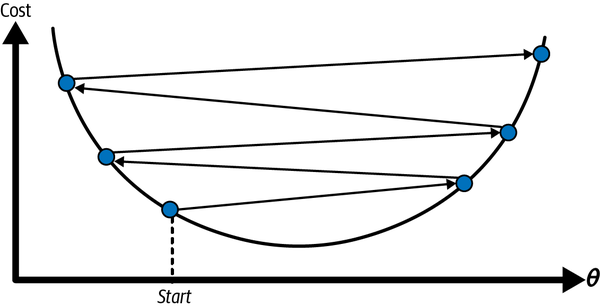

Additionally, not all cost functions look like nice, regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrain, making convergence to the minimum difficult. Following figure shows the two main challenges with gradient descent. If the random initialization starts the algorithm on the left, then it will converge to a local minimum, which is not as good as the global minimum. If it starts on the right, then it will take a very long time to cross the plateau. And if you stop too early, you will never reach the global minimum. <br>
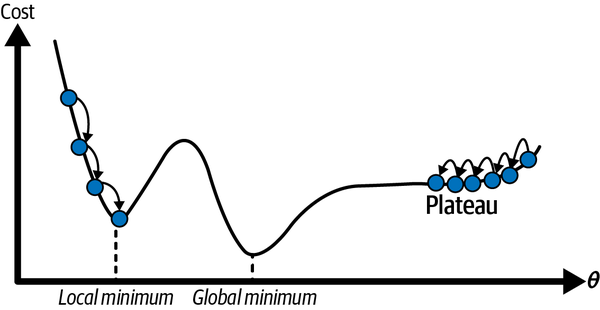

Fortunately, the MSE cost function for a linear regression model happens to be a convex function, which means that if you pick any two points on the curve, the line segment joining them is never below the curve. This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly. These two facts have a great consequence: gradient descent is guaranteed to approach arbitrarily closely the global minimum (if you wait long enough and if the learning rate is not too high).

While the cost function has the shape of a bowl, it can be an elongated bowl if the features have very different scales. Following figure shows gradient descent on a training set where features 1 and 2 have the same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on the right). <br>
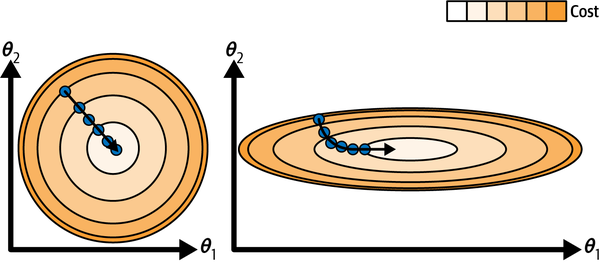

As you can see, on the left the gradient descent algorithm goes straight toward the minimum, thereby reaching it quickly, whereas on the right it first goes in a direction almost orthogonal to the direction of the global minimum, and it ends with a long march down an almost flat valley. It will eventually reach the minimum, but it will take a long time. <br>
When using gradient descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

This diagram also illustrates the fact that training a model means searching for a combination of model parameters that minimizes a cost function (over the training set). It is a search in the model’s parameter space. The more parameters a model has, the more dimensions this space has, and the harder the search is: searching for a needle in a 300-dimensional haystack is much trickier than in 3 dimensions. Fortunately, since the cost function is convex in the case of linear regression, the needle is simply at the bottom of the bowl.

**Batch Gradient Descent**

To implement gradient descent, you need to compute the gradient of the cost function with regard to each model parameter θj. In other words, you need to calculate how much the cost function will change if you change θj just a little bit. This is called a partial derivative. It is like asking, “What is the slope of the mountain under my feet if I face east”? and then asking the same question facing north (and so on for all other dimensions, if you can imagine a universe with more than three dimensions). Following equation computes the partial derivative of the MSE with regard to parameter θj, noted ∂ MSE(θ) / ∂θj. <br>
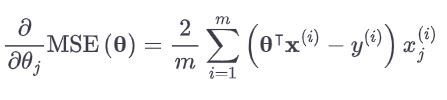

Instead of computing these partial derivatives individually, you can use following equation to compute them all in one go. The gradient vector, noted ∇θMSE(θ), contains all the partial derivatives of the cost function (one for each model parameter). <br>
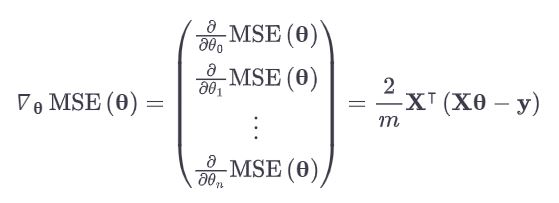

Notice that this formula involves calculations over the full training set X, at each gradient descent step! This is why the algorithm is called batch gradient descent: it uses the whole batch of training data at every step (actually, full gradient descent would probably be a better name). As a result, it is terribly slow on very large training sets (we will look at some much faster gradient descent algorithms shortly). However, gradient descent scales well with the number of features; training a linear regression model when there are hundreds of thousands of features is much faster using gradient descent than using the Normal equation or SVD decomposition.

Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting ∇θMSE(θ) from θ. This is where the learning rate η comes into play:⁠ multiply the gradient vector by η to determine the size of the downhill step: <br>
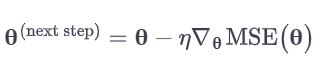

Let’s look at a quick implementation of this algorithm:

In [ ]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

The trained model parameters:

In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

Hey, that’s exactly what the Normal equation found! Gradient descent worked perfectly. But what if you had used a different learning rate (eta)? Following figure shows the first 20 steps of gradient descent using three different learning rates. The line at the bottom of each plot represents the random starting point, then each epoch is represented by a darker and darker line. <br>
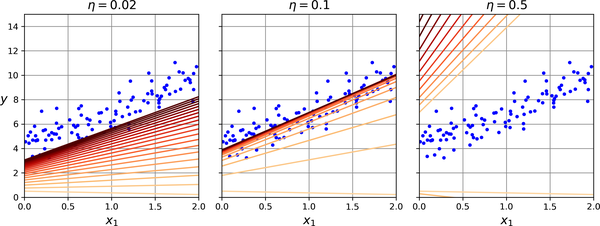

On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. In the middle, the learning rate looks pretty good: in just a few epochs, it has already converged to the solution. On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step.

To find a good learning rate, you can use grid search (we will talk about this later). However, you may want to limit the number of epochs so that grid search can eliminate models that take too long to converge.

You may wonder how to set the number of epochs. If it is too low, you will still be far away from the optimal solution when the algorithm stops; but if it is too high, you will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of epochs but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number ϵ (called the tolerance)—because this happens when gradient descent has (almost) reached the minimum.

**Stochastic Gradient Descent**

The main problem with batch gradient descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, stochastic gradient descent picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously, working on a single instance at a time makes the algorithm much faster because it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (stochastic GD can be implemented as an out-of-core algorithm.

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than batch gradient descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down (following figure). Once the algorithm stops, the final parameter values will be good, but not optimal. <br>
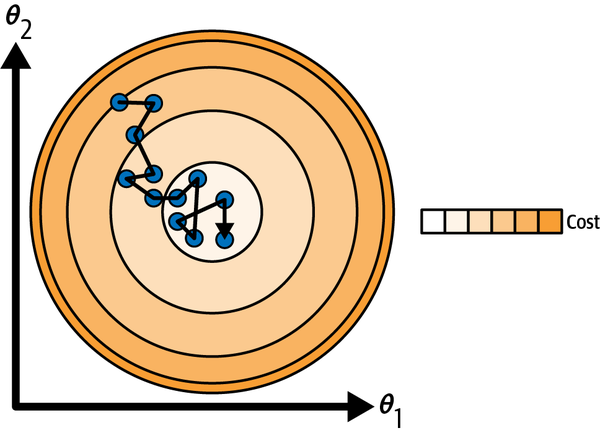

When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so stochastic gradient descent has a better chance of finding the global minimum than batch gradient descent does.

Therefore, randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is akin to simulated annealing, an algorithm inspired by the process in metallurgy of annealing, where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

This code implements stochastic gradient descent using a simple learning schedule:

In [ ]:
theta_path_sgd = []

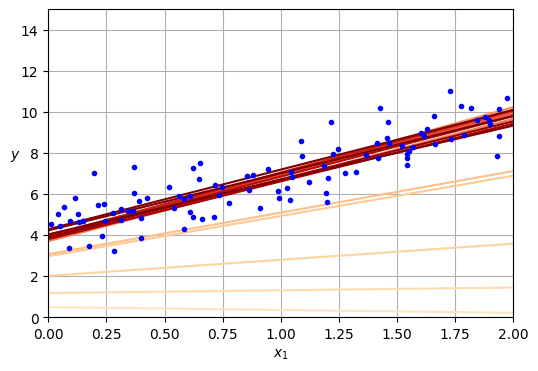

In [ ]:
import matplotlib as mpl
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # extra code – to generate the figure

# extra code – this section beautifies and saves Figure 4–10
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

Note that since instances are picked randomly, some instances may be picked several times per epoch, while others may not be picked at all. If you want to be sure that the algorithm goes through every instance at each epoch, another approach is to shuffle the training set (making sure to shuffle the input features and the labels jointly), then go through it instance by instance, then shuffle it again, and so on. However, this approach is more complex, and it generally does not improve the result.

By convention we iterate by rounds of m iterations; each round is called an epoch, as earlier. While the batch gradient descent code iterated 1,000 times through the whole training set, this code goes through the training set only 50 times and reaches a pretty good solution:

In [ ]:
theta

array([[4.21076011],
       [2.74856079]])

To perform linear regression using stochastic GD with Scikit-Learn, you can use the SGDRegressor class, which defaults to optimizing the MSE cost function. The following code runs for maximum 1,000 epochs (max_iter) or until the loss drops by less than 10–5 (tol) during 100 epochs (n_iter_no_change). It starts with a learning rate of 0.01 (eta0), using the default learning schedule (different from the one we used). Lastly, it does not use any regularization (penalty=None; more details on this shortly):

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

Once again, you find a solution quite close to the one returned by the Normal equation:

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))